In [97]:
import numpy as np
import pandas as pd

data = pd.read_csv("Carseats.csv")

shelveDummies = pd.get_dummies(data['ShelveLoc'], prefix="shelve")
urbanDummies = pd.get_dummies(data['Urban'], prefix='urban')
USDummies = pd.get_dummies(data['US'], prefix='US')

X = data.drop(['Sales'], axis=1).join(shelveDummies).join(urbanDummies).join(USDummies).drop(['ShelveLoc', 'Urban', 'US'], axis=1).iloc[:, 1:]

y=data['Sales']

In [104]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
clf = DecisionTreeRegressor(max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.5, random_state=1234)

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))

4.803816271935667


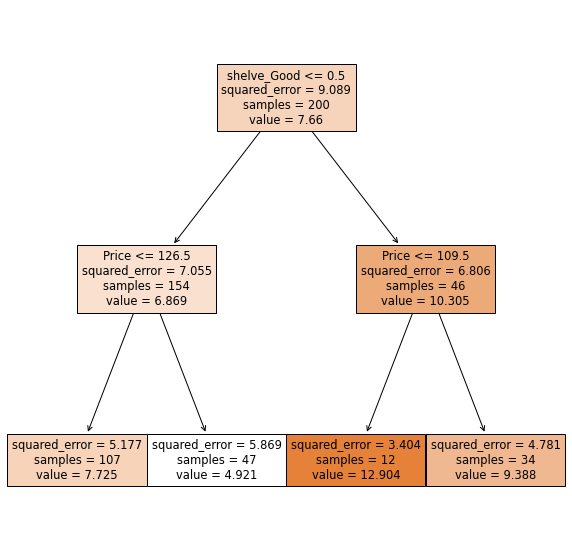

In [105]:
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   filled=True)

In [106]:
from sklearn.model_selection import KFold

k = 10

kf = KFold(n_splits=k)

scores = []
best_col = 0
best_score = np.inf

maxTreeCol = 20

for a in np.arange(1,maxTreeCol):
  clf = DecisionTreeRegressor(max_depth=a)

  CVsum = 0
  for train_indices, test_indices in kf.split(X, y):
    predictions = clf.fit(X.iloc[train_indices], y[train_indices]).predict(X.iloc[test_indices])
    #we need MSE
    MSE = len(test_indices) * mean_squared_error(y[test_indices], predictions)
    CVsum = CVsum + MSE

  CV = CVsum / k
  scores.append(CV)

  if CV < best_score:
    best_score = CV
    best_degree = a

Best complexity is: 
6


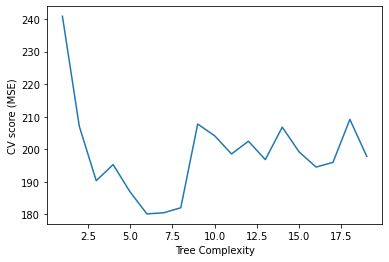

In [107]:
plt.xlabel("Tree Complexity")
plt.ylabel("CV score (MSE)")

plt.plot(range(1,maxTreeCol), scores)

print("Best complexity is: ")
print(best_degree)

In [108]:
from sklearn.ensemble import BaggingRegressor

bagger = BaggingRegressor(random_state=1234, n_estimators=100)
bagger.fit(X_train, y_train)

predictions = bagger.predict(X_test)
print("Bagging MSE")
print(mean_squared_error(y_test, predictions))


Bagging MSE
2.4321834813999987


In [109]:
from sklearn.ensemble import RandomForestRegressor

forester = RandomForestRegressor(random_state=1234, n_estimators=100, max_features='auto')
forester.fit(X_train, y_train)

predictions = forester.predict(X_test)
print("Forest MSE")
print(mean_squared_error(y_test, predictions))

Forest MSE
2.385195091199999


Feature: 0, Score: 0.08983
Feature: 1, Score: 0.04884
Feature: 2, Score: 0.07514
Feature: 3, Score: 0.03570
Feature: 4, Score: 0.31603
Feature: 5, Score: 0.07755
Feature: 6, Score: 0.03291
Feature: 7, Score: 0.11903
Feature: 8, Score: 0.16312
Feature: 9, Score: 0.03103
Feature: 10, Score: 0.00224
Feature: 11, Score: 0.00232
Feature: 12, Score: 0.00330
Feature: 13, Score: 0.00295


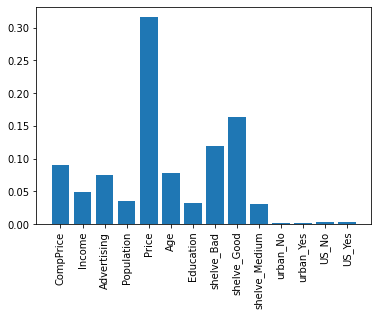

In [115]:
from matplotlib import pyplot

# get importance
importance = forester.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in X.columns], importance, width=0.8)
pyplot.xticks(rotation='vertical')
pyplot.show()

In [94]:
numEstimators = X.shape[1]

forest_list_mse = []
forest_best_mse = np.inf
forest_best_numEstimators = 0

for a in range(1, numEstimators):
  forester = RandomForestRegressor(random_state=1234, n_estimators=100, max_features=a)
  forester.fit(X_train, y_train)

  predictions = forester.predict(X_test)
  mse = mean_squared_error(y_test, predictions)

  forest_list_mse.append(mse)

  if mse < forest_best_mse:
    forest_best_mse = mse
    forest_best_numEstimators = a
  

Best number of estimators is: 
12


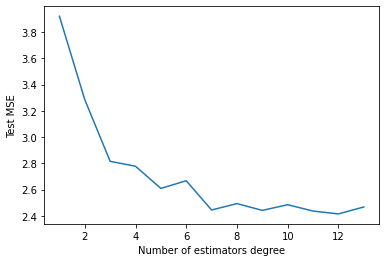

In [95]:
plt.xlabel("Number of estimators degree")
plt.ylabel("Test MSE")

plt.plot(range(1,numEstimators), forest_list_mse)

print("Best number of estimators is: ")
print(forest_best_numEstimators)